## Observations and Insights

Analysis of artifical data set revolving around anti-cancer pharmaceuticals. Analyze screening data of different treatments for SCC, a commonly occuring form of skin cancer.
Purpose of study being to compare the performance of the company's drug of interest, Capomulin, versus the other treatment regimes. 
Task: Provide techincal report of the study with tables and figures, along with top-level summary of the results. 

Results Summary:


## Dependencies and starter code

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#combine data sets on the field displaying MOUSE ID aka the only shared field
mickeymouse = pd.merge(study_results, mouse_metadata, on="Mouse ID")

#show the data set
mickeymouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#organizes the data and focues on the field names Drug Regimen
stats_data = mickeymouse[["Drug Regimen", "Tumor Volume (mm3)"]]
regimens = stats_data.groupby(["Drug Regimen"])

#calculates the average/mean of the Tumor Volume data from the mickeymouse data frame
tumor_mean = regimens["Tumor Volume (mm3)"].mean()

#calculates the median of the Tumor Volume data from the mickeymouse data frame
tumor_median = regimens["Tumor Volume (mm3)"].median()

#calculates the variance of the Tumor Volume data from the mickeymouse data frame
tumor_variance = regimens["Tumor Volume (mm3)"].var()

#calculates the standard devition of the Tumor Volume data from the mickeymouse data frame
tumor_stdev = regimens["Tumor Volume (mm3)"].std()

#calculates sem of data from the mickeymouse dataframe,
#which is the standard deviaiton devided by the square root of the sample size (total) 
tumor_sem = regimens["Tumor Volume (mm3)"].sem()

#summary statistics 
summary_df = pd.DataFrame({"Mean": tumor_mean, 
                           "Median": tumor_median, 
                           "Variance": tumor_variance, 
                           "Standard Deviation": tumor_stdev, 
                           "SEM Value": tumor_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM Value
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# group by regimens with count and mouse id to figure out where the data points lie
data_points = stats_data.groupby(["Drug Regimen"]).count()
data_points

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


## Bar plots

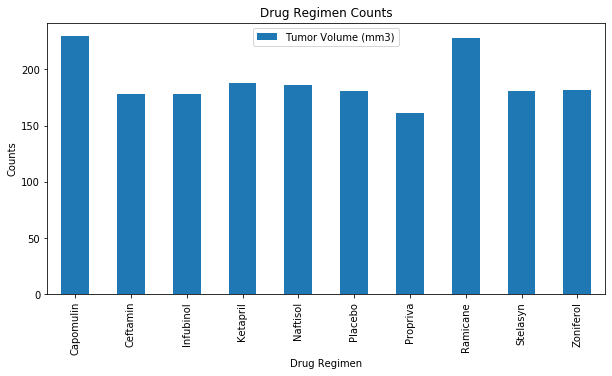

<Figure size 432x288 with 0 Axes>

In [59]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points.plot(kind="bar", figsize=(10,5))

# graph asthetics
plt.title("Drug Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Counts')

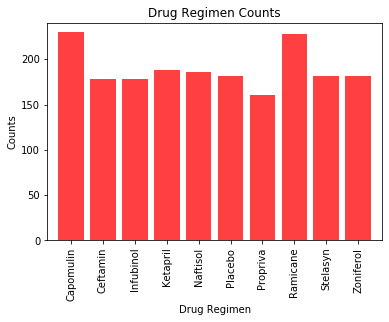

In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#data point array 
points = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(data_points))

plt.bar(x_axis, points, color="r", alpha=0.75, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(points)+10)

plt.title("Drug Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

## Pie plots

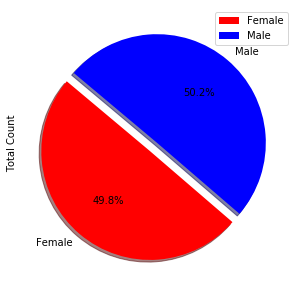

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = mickeymouse.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

colors = ['red', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

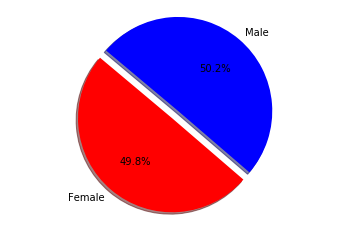

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['red', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

## Quartiles, outliers and boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_regimes = mickeymouse[mickeymouse["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1613,Ceftamin,x226,0,45.000000
1488,Ceftamin,x581,0,45.000000
1478,Ceftamin,a275,0,45.000000
1468,Ceftamin,k210,0,45.000000
...,...,...,...,...
1824,Capomulin,g316,45,40.159220
1477,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1497,Ceftamin,x581,45,64.634949


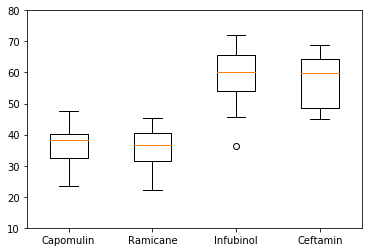

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interestbest_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimens_df = best_regimens_sort.to_frame()
best_regimens_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimens_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plot.set_title("Box & whisker across Regimens")
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

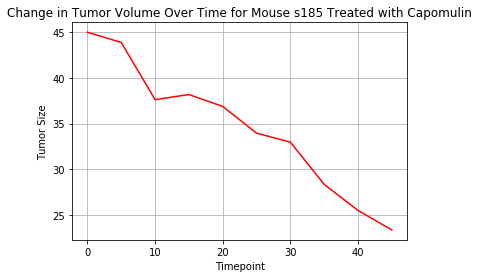

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original dataframe by Campomulin
capomulin_only_df = mickeymouse.loc[(mickeymouse["Drug Regimen"] == "Capomulin")]

# Filter Campomulin data by only mouse s185
mouse_s185 = capomulin_only_df.loc[(capomulin_only_df["Mouse ID"] == "s185")]

# Assign variables for time data from mouse_s185's Timepoint column
time = mouse_s185['Timepoint']

# Assign variables for tumor volume data from mouse_s185's Tumor Volume (mm3) column
tumor_volume = mouse_s185['Tumor Volume (mm3)']

# Plot on line chart and assign labels
plt.plot(time, tumor_volume, color="red", label="Danger Drop")
plt.title("Change in Tumor Volume Over Time for Mouse s185 Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size")
plt.grid()
plt.show()

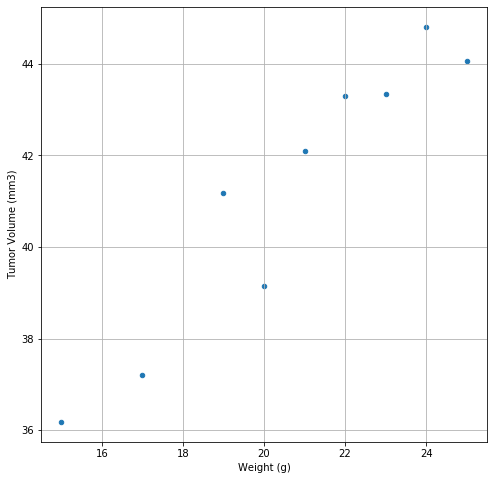

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = mickeymouse[mickeymouse["Drug Regimen"].isin(["Capomulin"])]
#capomulin_scatter

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
#capomulin_scatter_df

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


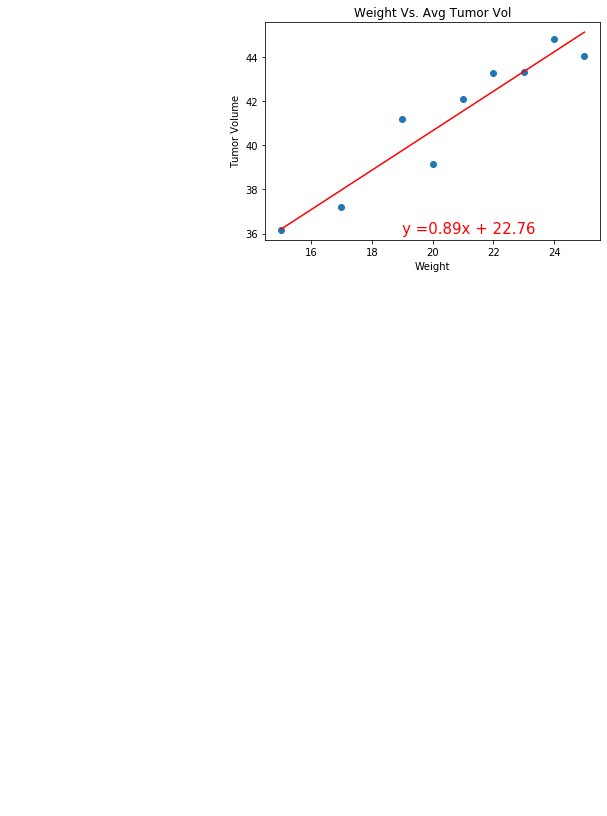

In [74]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# obtain regression values 
regress_values = x_values * slope + intercept

# linear regression trend line
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#linear regression equation
plt.annotate(line_eq,(19,36),fontsize=15,color="red")

#plotting
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()